In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
# Load Data
df = pd.read_csv('Penyakit jantung.csv')


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Pisahkan Data Atribut dengan Label
X = df.drop(columns='DEATH_EVENT', axis=1)
Y = df['DEATH_EVENT']

In [ ]:
# Pisahkan Data Training dan Data Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=)

In [ ]:
# Membuat Model Training
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Evaluasi Model
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Akurasi data training:', training_data_accuracy)

Akurasi data training: 0.8158995815899581


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Akurasi data testing:', test_data_accuracy)

Akurasi data testing: 0.8


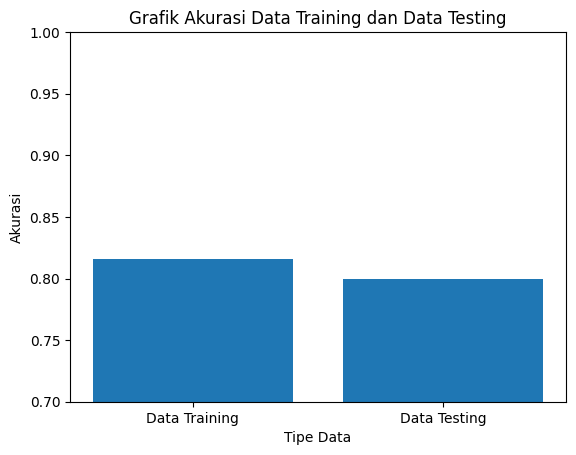

In [ ]:
# Membuat Grafik Akurasi
accuracy_list = [training_data_accuracy, test_data_accuracy]
accuracy_labels = ['Data Training', 'Data Testing']
plt.bar(accuracy_labels, accuracy_list)
plt.title('Grafik Akurasi Data Training dan Data Testing')
plt.xlabel('Tipe Data')
plt.ylabel('Akurasi')
plt.ylim([0.7, 1])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Melakukan prediksi dengan cross validation
predictions = cross_val_predict(model, X, Y, cv=10)

# Menghitung nilai accuracy, precision, dan recall
accuracy = accuracy_score(Y, predictions)
micro_avg= precision_score(Y, predictions, average='micro')
weighted_avg = precision_score(Y, predictions, average='weighted')


# Membuat tabel metrics
import pandas as pd

table = pd.DataFrame({
    'Metrics': ['Accuracy', 'Micro Avg ', 'Weighted Avg '],
    'Value': [accuracy, micro_avg, weighted_avg]
})

print(table)


         Metrics     Value
0       Accuracy  0.785953
1     Micro Avg   0.785953
2  Weighted Avg   0.780349


In [ ]:
jumlah_pasien = len(df)
jumlah_pasien_terkena = len(df[df['DEATH_EVENT']==1])
jumlah_pasien_tidak_terkena = len(df[df['DEATH_EVENT']==0])

print("Jumlah pasien: ", jumlah_pasien)
print("Jumlah pasien terkena resiko penyakit jantung: ", jumlah_pasien_terkena)
print("Jumlah pasien tidak terkena resiko penyakit jantung: ", jumlah_pasien_tidak_terkena)


Jumlah pasien:  299
Jumlah pasien terkena resiko penyakit jantung:  96
Jumlah pasien tidak terkena resiko penyakit jantung:  203


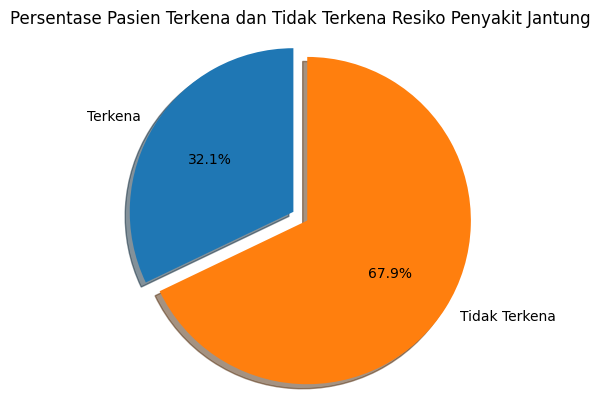

In [ ]:
# Pie Chart
labels = 'Terkena', 'Tidak Terkena'
sizes = [jumlah_pasien_terkena, jumlah_pasien_tidak_terkena]
explode = (0.1, 0)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Persentase Pasien Terkena dan Tidak Terkena Resiko Penyakit Jantung')
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# prediksi model Naive Bayes
y_pred = model.predict(X_test)

# mencari nilai recall, precision, dan F1-score
report = classification_report(Y_test, y_pred, output_dict=True)

# mencetak nilai recall, precision, dan F1-score
print("Recall:", report['weighted avg']['recall'])
print("Precision:", report['weighted avg']['precision'])
print("F1-score:", report['weighted avg']['f1-score'])

Recall: 0.8
Precision: 0.7960720130932896
F1-score: 0.7880681818181817
